<a href="https://colab.research.google.com/github/Marianno77/data-science/blob/main/Uczenie_Maszynowe/drezwo_decyzyjne.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Drzewo decyzyjne**

## Import bibliotek

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pydotplus

from IPython.display import Image
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
from sklearn.metrics import accuracy_score
from io import StringIO
from mlxtend.plotting import plot_decision_regions

sns.set()
np.random.seed(10)

## Załadowanie danych

In [9]:
iris = load_iris()
data = iris.data
target = iris.target
feature_names = [name.replace(' ','_')[:-5] for name in iris.feature_names]
class_names = iris.target_names

print(len(data))
print(data.shape)
print(target.shape)
print(feature_names)
print(class_names)

150
(150, 4)
(150,)
['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
['setosa' 'versicolor' 'virginica']


## Eksploatacja danych

Setosa:

In [14]:
Image(url='https://ml-repository-krakers.s3-eu-west-1.amazonaws.com/decision_tree_course/graphs/Iris_setosa.jpg', width=200)

versicolor:

In [11]:
Image(url='https://ml-repository-krakers.s3-eu-west-1.amazonaws.com/decision_tree_course/graphs/Iris_versicolor.jpg', width=200)

virginica:

In [12]:
Image(url='https://ml-repository-krakers.s3-eu-west-1.amazonaws.com/decision_tree_course/graphs/Iris_virginica.jpg', width=200)

In [23]:
data_targets = np.c_[data, target]
df = pd.DataFrame(data_targets, columns=feature_names+['class'])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [24]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal_length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal_width,150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal_length,150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5
class,150.0,1.000000,0.819232,0.0,0.0,1.00,2.0,2.0


In [25]:
df.describe().T.apply(lambda x: round(x,2))

,count,mean,std,min,25%,50%,75%,max
sepal_length,150.0,5.84,0.83,4.3,5.1,5.80,6.4,7.9
sepal_width,150.0,3.06,0.44,2.0,2.8,3.00,3.3,4.4
petal_length,150.0,3.76,1.77,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,1.20,0.76,0.1,0.3,1.30,1.8,2.5
class,150.0,1.00,0.82,0.0,0.0,1.00,2.0,2.0


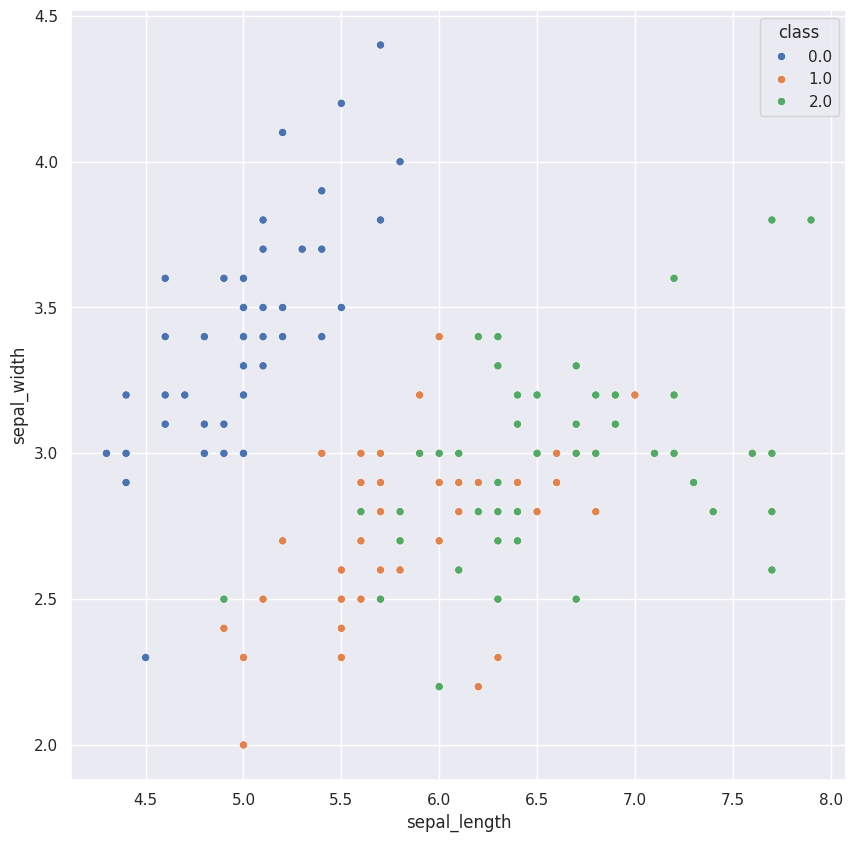

In [26]:
plt.figure(figsize=(10,10))
_ = sns.scatterplot(df, x='sepal_length', y='sepal_width', hue='class', legend='full', palette=sns.color_palette()[:3])

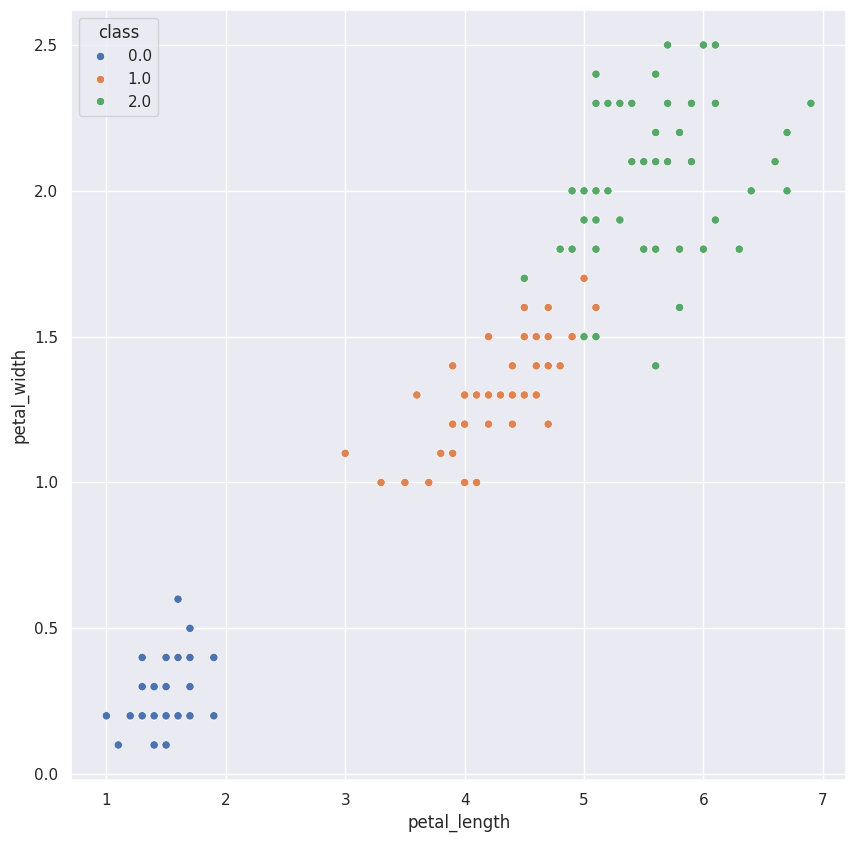

In [27]:
plt.figure(figsize=(10,10))
_ = sns.scatterplot(df, x='petal_length', y='petal_width', hue='class', legend='full', palette=sns.color_palette()[:3])

In [28]:
df['class'].value_counts()

,count
class,
0.0,50
1.0,50
2.0,50


## Przygotowanie danych do modelu

In [29]:
X = df.copy()
X = X[['petal_length', 'petal_width', 'class']]
y = X.pop('class')

In [30]:
X.head()

,petal_length,petal_width
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


In [31]:
y.head()

,class
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [32]:
X = X.values
y = y.values.astype('int16')

## Budowa klasyfikatora drzewa decyzyjnego

In [35]:
classifier = DecisionTreeClassifier(max_depth=1, random_state=30)
classifier.fit(X, y)

DecisionTreeClassifier(max_depth=1, random_state=30)

Wykreślanie granic decyzyjnych:

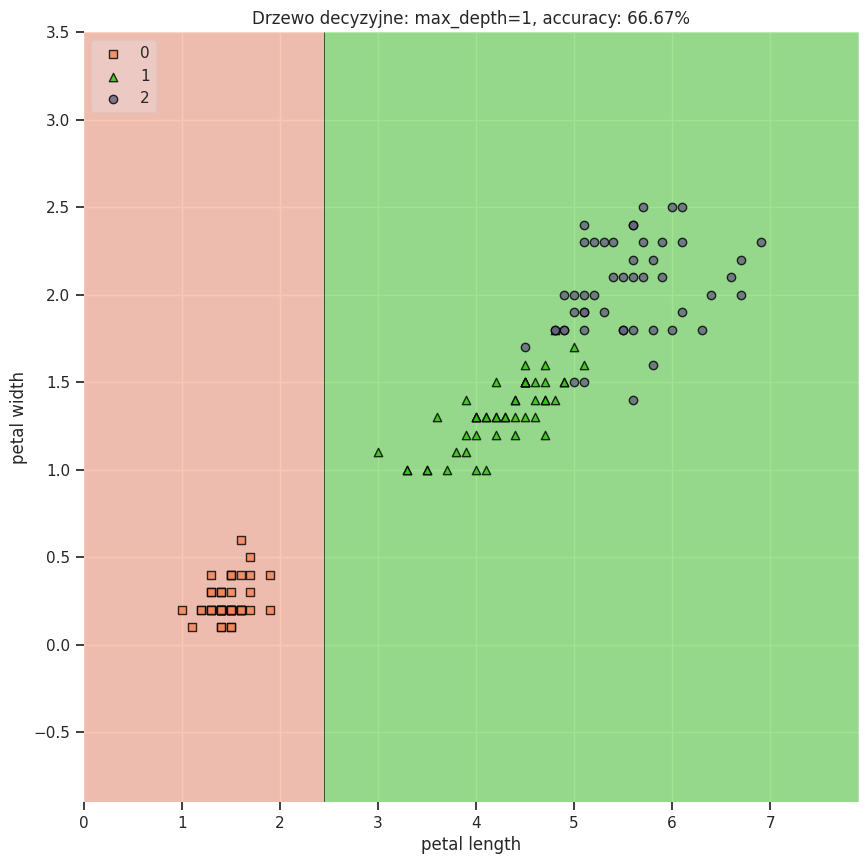

In [37]:
colors='#f1865b,#31c30f,#64647F,#d62728,#9467bd,#8c564b,#e377c2,#7f7f7f,#bcbd22,#17becf'

acc = classifier.score(X, y) * 100

plt.figure(figsize=(10,10))
plot_decision_regions(X, y, classifier, legend=2, colors=colors)
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.title(f'Drzewo decyzyjne: max_depth=1, accuracy: {acc:.2f}%')
plt.show()

## Graf drzewa decyzyjnego

In [40]:
export_graphviz(classifier,
                out_file='iris_tree.dot',
                feature_names=iris.feature_names[2:],
                class_names=iris.target_names,
                rounded=True,
                filled=True)

wyświetlanie grafu drzewa decyzyjnego

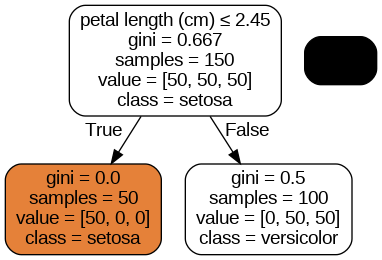

In [57]:
dot_data = StringIO()
export_graphviz(classifier,
                out_file=dot_data,
                feature_names=iris.feature_names[2:],
                class_names=class_names,
                special_characters=True,
                rounded=True,
                filled=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('iris_tree.png')
Image(graph.create_png())

## Budowa funkcji dla modelu drzewa decyzyjnego

In [60]:
def tree(max_depth=1):
  classifier = DecisionTreeClassifier(max_depth=max_depth, random_state=30)
  classifier.fit(X, y)

  dot_data = StringIO()
  export_graphviz(classifier,
                  out_file=dot_data,
                  feature_names=iris.feature_names[2:],
                  class_names=class_names,
                  special_characters=True,
                  rounded=True,
                  filled=True)
  graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
  graph.write_png('iris_tree.png')

  acc = classifier.score(X, y) * 100

  colors = '#f1865b,#31c30f,#64647F,#d62728,#9467bd,#8c564b,#e377c2,#7f7f7f,#bcbd22,#17becf'
  plt.figure(figsize=(10,10))
  ax = plot_decision_regions(X, y, classifier, legend=0, colors=colors)
  handles, labels = ax.get_legend_handles_labels()
  ax.legend(handles, class_names, framealpha=0.3)
  plt.xlabel('petal length')
  plt.ylabel('petal width')
  plt.title(f'Drzewo decyzyjne: max_depth={max_depth}, accuracy: {acc:.2f}%')

  return Image(graph.create_png(), width=150 + max_depth * 80)

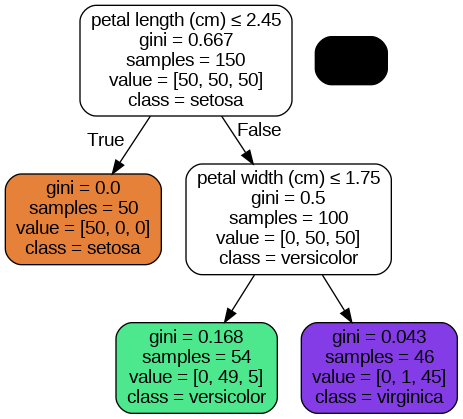

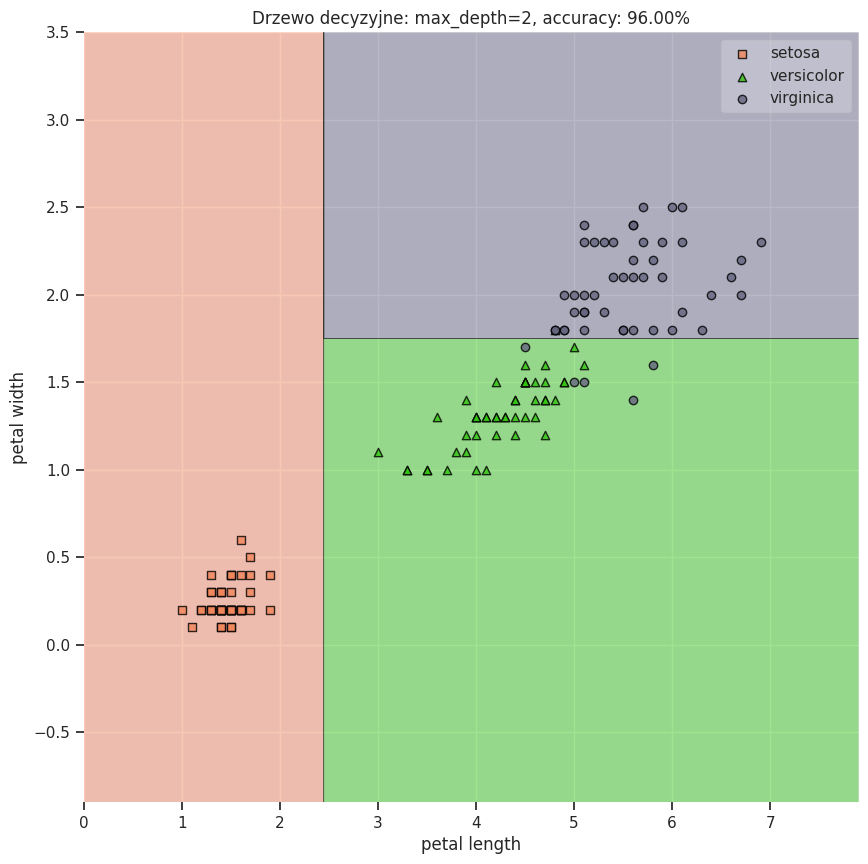

In [61]:
tree(2)

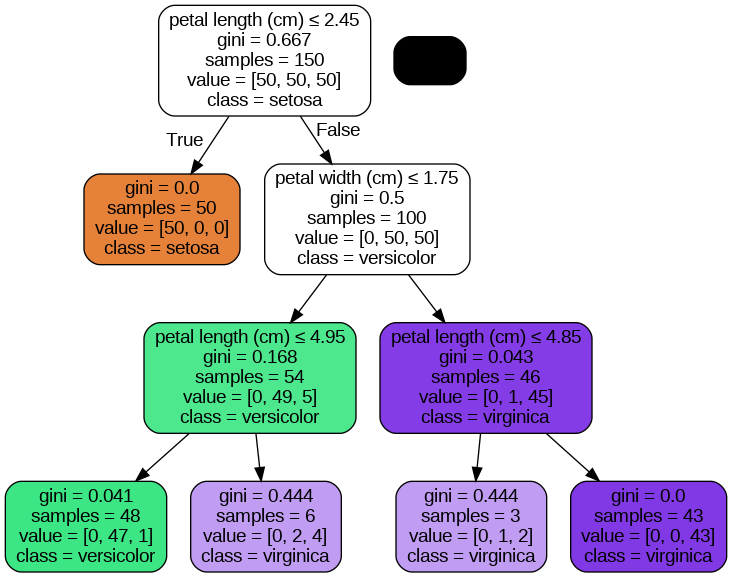

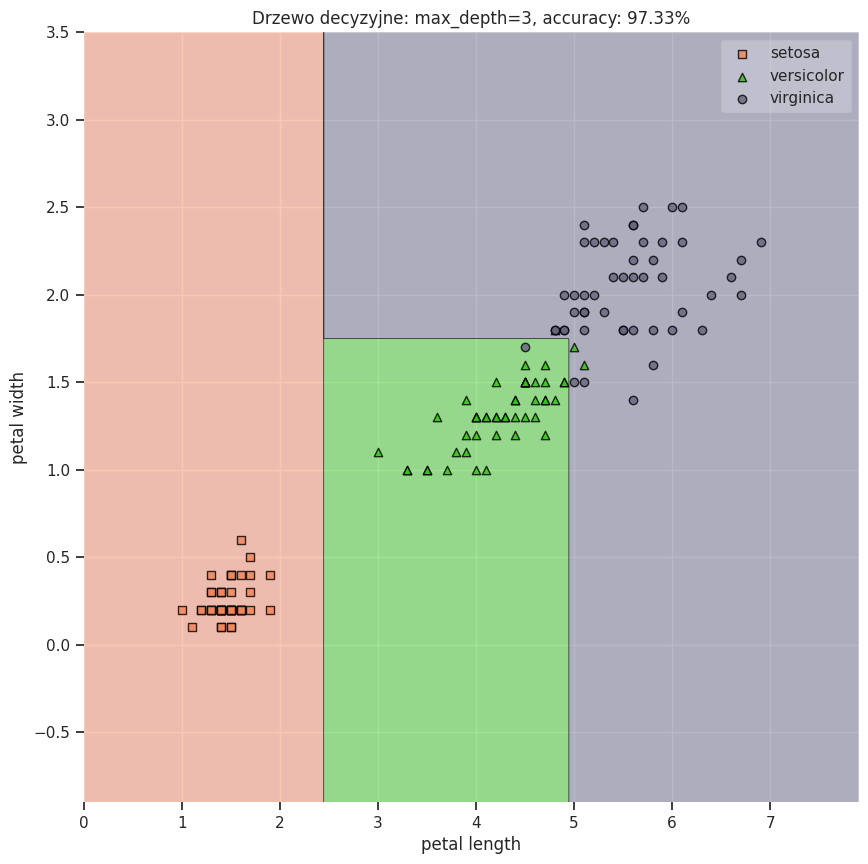

In [62]:
tree(3)

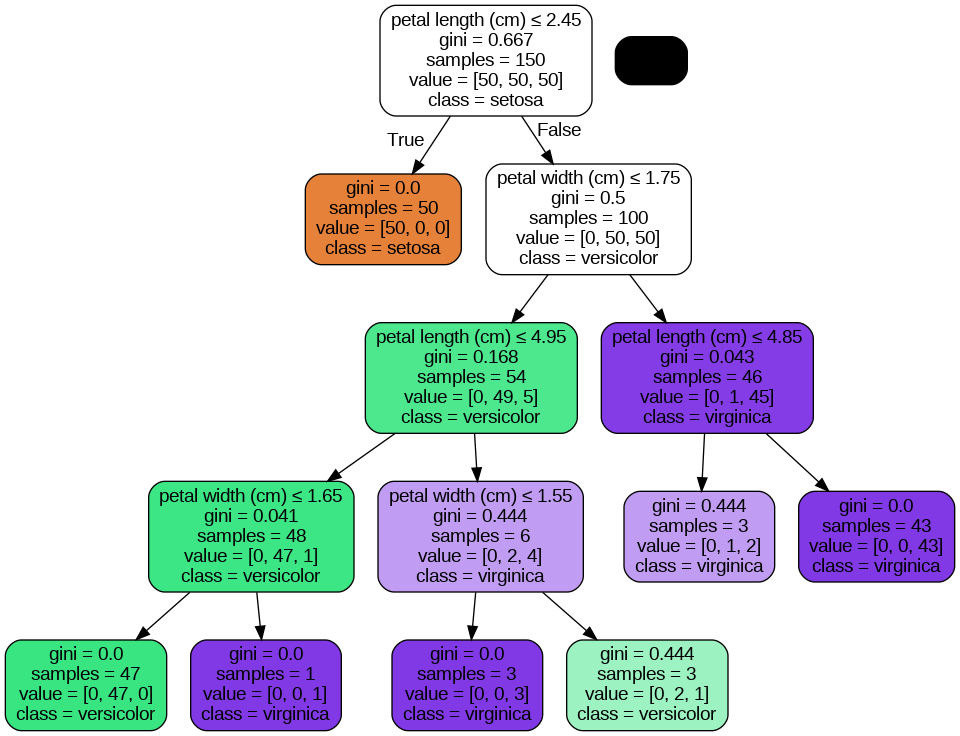

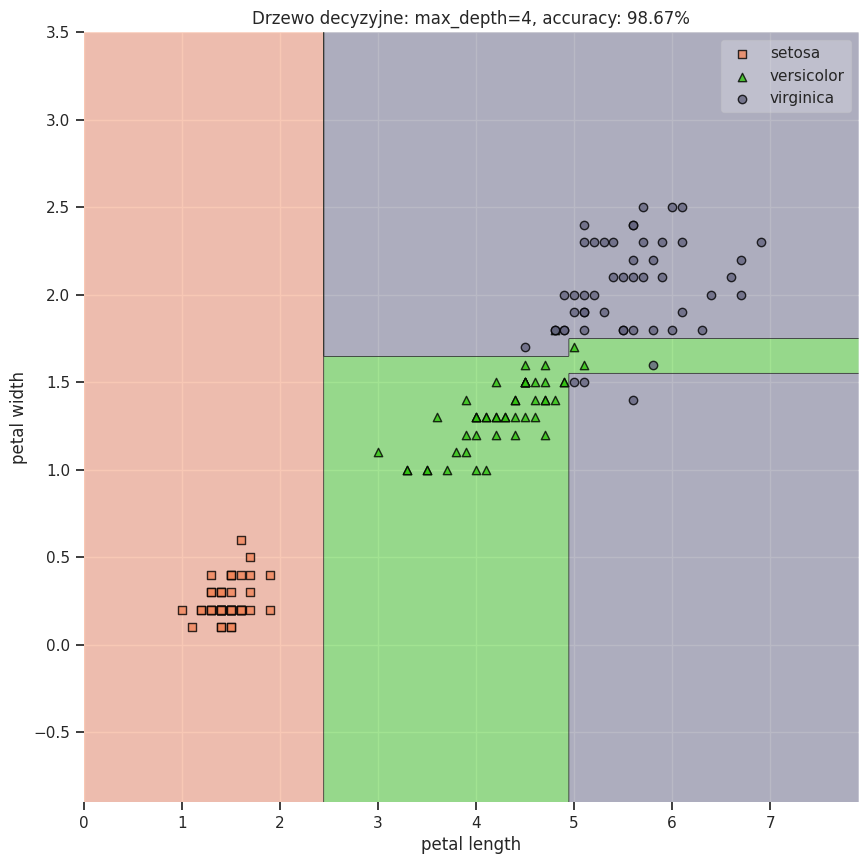

In [63]:
tree(4)

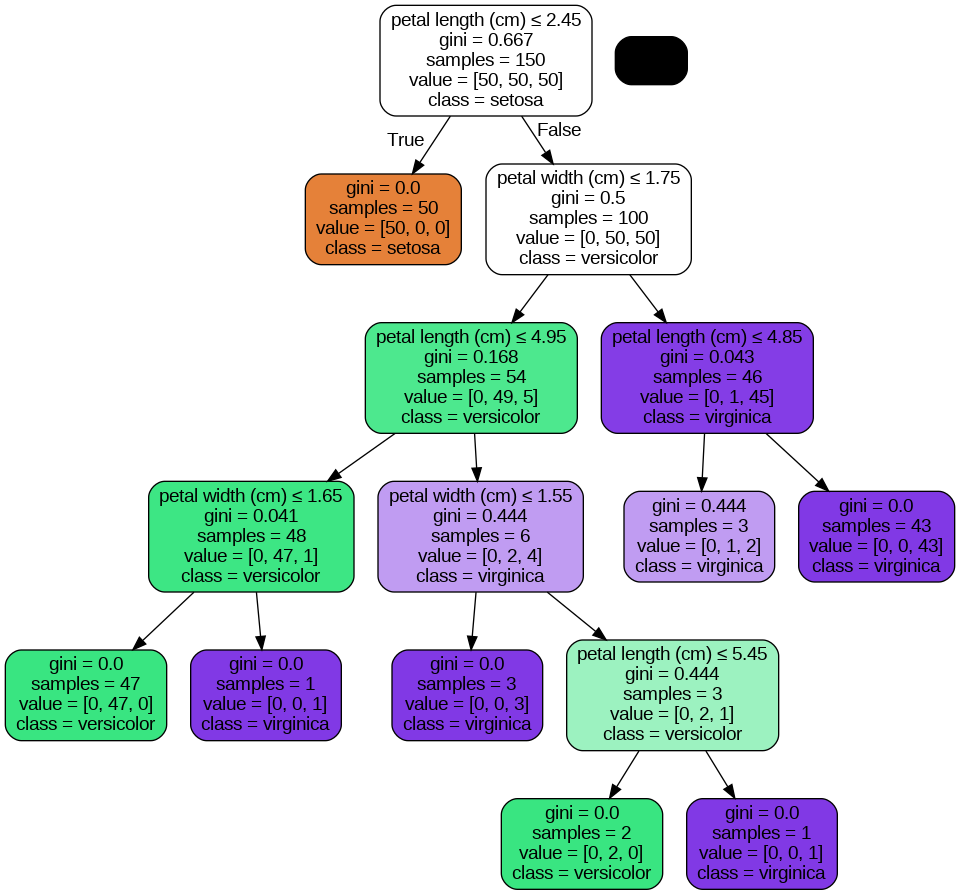

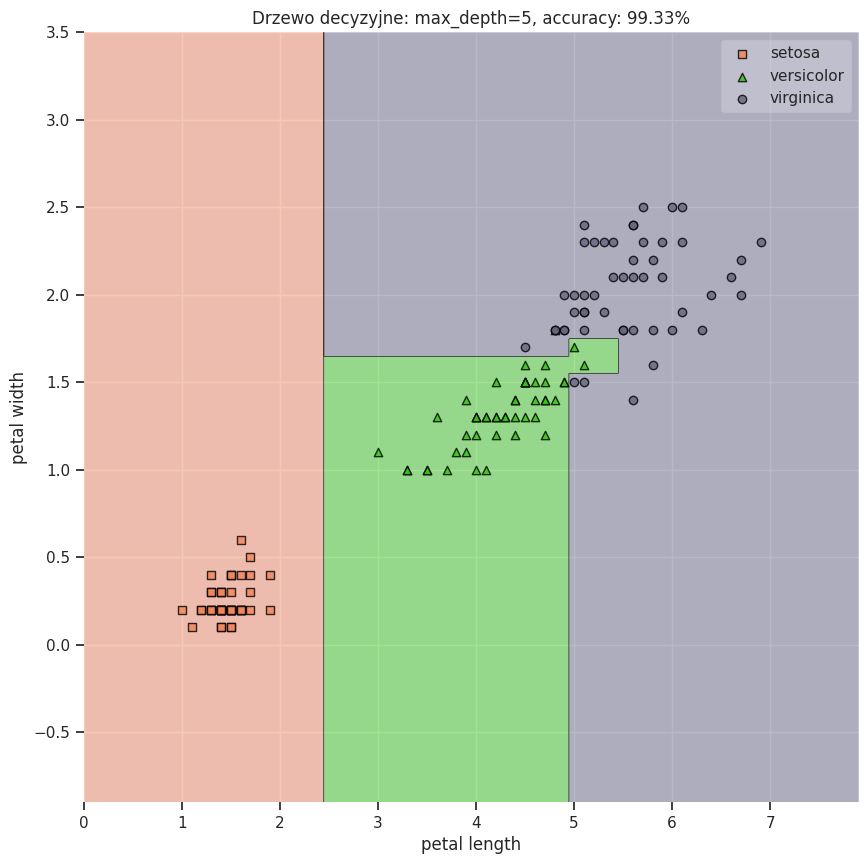

In [66]:
tree(5)